In [1]:
with open("tweets.txt","r",encoding = "utf-8") as f:
    data = f.read()

tweets = data.split("\n")
tweets_clean = [tweet for tweet in tweets if len(tweet)>15]


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
stop_words = set(stopwords.words('english'))

In [3]:
tweets_df = pd.DataFrame(tweets_clean, index=None,columns=["Tweets"])
tweets_df.head()

,Tweets
0,Why are you charging e-levy on 41 cedis transf...
1,Citizens' resistance to the electronic transac...
2,- Prof. Godfred Bokpin [Eco…RT @ThePhilipPhili...
3,2.Everyone who receives 70gh a month is very R...
4,3. Breaking the 8


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  865 non-null    object
dtypes: object(1)
memory usage: 6.9+ KB


In [5]:
tweets_df.describe()

,Tweets
count,865
unique,719
top,So tell me why I’m being charged E-levy for ma...
freq,24


In [6]:
#removing #, @ and links 
# removing hashtags
def remove_hashtags(text):
    hashtag = re.compile("#")
    return hashtag.sub("", text)

#removing @ symbols
def remove_at(text):
    at = re.compile("@")
    return at.sub("", text)

# removing links
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
def get_words(text):
    return (text)

tweets_df["Tweets"] = tweets_df["Tweets"].apply(remove_at)
tweets_df["Tweets"] = tweets_df["Tweets"].apply(remove_hashtags)
tweets_df["Tweets"] = tweets_df["Tweets"].apply(remove_URL)

tweets_df.head()

,Tweets
0,Why are you charging e-levy on 41 cedis transf...
1,Citizens' resistance to the electronic transac...
2,- Prof. Godfred Bokpin [Eco…RT ThePhilipPhilip...
3,2.Everyone who receives 70gh a month is very R...
4,3. Breaking the 8


In [7]:
#removing stopwords

lemmatizer = WordNetLemmatizer()

for i in range(tweets_df.shape[0]):
    # tokenizing words in each tweet
    words = word_tokenize(tweets_df["Tweets"][i])
    # joining the tokens to form a sentence
    tokens = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    clean_tokens =" ".join([word for word in words])
    tweets_df["Tweets"][i] = clean_tokens
    
tweets_df

,Tweets
0,Why are you charging e-levy on 41 cedis transf...
1,Citizens ' resistance to the electronic transa...
2,- Prof. Godfred Bokpin [ Eco…RT ThePhilipPhili...
3,2.Everyone who receives 70gh a month is very Rich
4,3 . Breaking the 8
...,...
860,They 've been charging me e-levy on such too !...
861,I think Ghanaians should start making money fr...
862,W ) mo de anibr3 aba mu Bridget_Otoo : I calle...
863,Addo D : Have you heard about E-Levy AnnanPerr...


The top 20 common words are [('e-levy', 1233), (':', 1187), (',', 897), ('.', 889), ('?', 412), ('i', 408), ('’', 364), ('the', 326), ('said', 255), ('ghana', 252), ('charged', 197), ('besttolead', 175), ('nexttolead', 175), ('transactions', 171), ('transaction', 164), ('!', 162), ('charging', 153), ('addo', 151), ('day', 148), ('cedis', 147)]


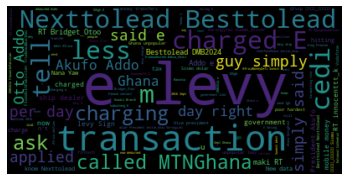

<Figure size 1152x576 with 0 Axes>

In [45]:
from wordcloud import WordCloud

def get_words(text):
    return (text)


words = " ".join(tweets_df["Tweets"].apply(get_words))

word_tokens = word_tokenize(words)
clean_word_tokens = [word.lower() for word in word_tokens if word not in stop_words]

count = Counter(clean_word_tokens)

top_20 = count.most_common(20)
print(f"The top 20 common words are {top_20}")
cloud = WordCloud(background_color="black").generate(words)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")

plt.figure(figsize=(16, 8))

plt.show()
#print(words)

In [9]:
from textblob import TextBlob

def check_sentiment_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def check_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity


#tweets_df["Subjectivity Score"] = tweets_df["Tweets"].apply(check_sentiment_subjectivity)
tweets_df["Polarity Score"] = tweets_df["Tweets"].apply(check_sentiment_polarity)

tweets_df

,Tweets,Polarity Score
0,Why are you charging e-levy on 41 cedis transf...,-0.125000
1,Citizens ' resistance to the electronic transa...,-0.025731
2,- Prof. Godfred Bokpin [ Eco…RT ThePhilipPhili...,0.500000
3,2.Everyone who receives 70gh a month is very Rich,0.487500
4,3 . Breaking the 8,0.000000
...,...,...
860,They 've been charging me e-levy on such too !...,-0.041667
861,I think Ghanaians should start making money fr...,0.437500
862,W ) mo de anibr3 aba mu Bridget_Otoo : I calle...,-0.083333
863,Addo D : Have you heard about E-Levy AnnanPerr...,-0.118519


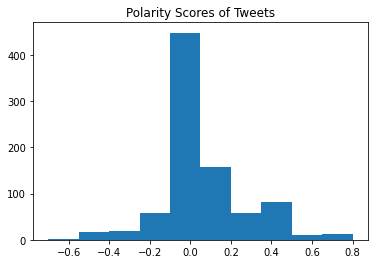

In [32]:
#ploting the sentiment scores
#plt.hist(tweets_df["Subjectivity Score"])
#plt.show()
plt.hist(tweets_df["Polarity Score"], bins=10)
plt.title("Polarity Scores of Tweets")
plt.show()

In [19]:
polarity_scores =  list(tweets_df["Polarity Score"])

def classify_polarity(score):
    if(score<0):
        return "Negative"
    elif(score>0):
        return "Positive"
    else:
        return "Neutral"

polarity_classification = [classify_polarity(polarity) for polarity in polarity_scores]
#print(polarity_classification)

In [26]:
#getting a list of all the positive scores
positive_scores = [score for score in polarity_classification if score == "Positive"]
num_of_positive = (len(positive_scores))


#getting a list of all negative scores
negative_scores = [score for score in polarity_classification if score == "Negative"]
num_of_negative = (len(negative_scores))


#getting a list of neutral scores
neuttral_scores = [score for score in polarity_classification if score == "Neutral"]
num_of_neutral = (len(neuttral_scores))

#printing out the total number of positive, negative and neutral scores
print(f"Total number of Positive scores is {num_of_positive} \n Total number of Negative scores is {num_of_negative} \n Total number of Neutral scores is {num_of_neutral}")

Total number of Positive scores is 352 
 Total number of Negative scores is 156 
 Total number of Neutral scores is 357


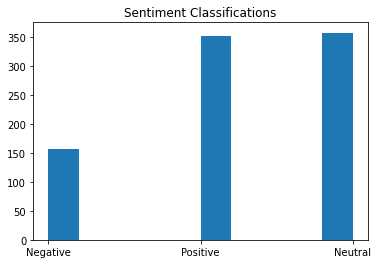

<Figure size 1152x720 with 0 Axes>

In [37]:
plt.hist(polarity_classification)
plt.title("Sentiment Classifications")
plt.figure(figsize=(16,10))
plt.show()